In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv("Housing.csv")

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
housing_data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Some Preprocessing

In [5]:
housing_data["mainroad"].unique()
housing_data["mainroad"] = housing_data["mainroad"].replace("no",0)
housing_data["mainroad"] = housing_data["mainroad"].replace("yes",1)

In [6]:
housing_data["guestroom"].unique()
housing_data["guestroom"] = housing_data["guestroom"].replace("no",0)
housing_data["guestroom"] = housing_data["guestroom"].replace("yes",1)

In [7]:
housing_data["basement"].unique()
housing_data["basement"] = housing_data["basement"].replace("no",0)
housing_data["basement"] = housing_data["basement"].replace("yes",1)

In [8]:
housing_data["hotwaterheating"].unique()
housing_data["hotwaterheating"] = housing_data["hotwaterheating"].replace("no",0)
housing_data["hotwaterheating"] = housing_data["hotwaterheating"].replace("yes",1)

In [9]:
housing_data["airconditioning"].unique()
housing_data["airconditioning"] = housing_data["airconditioning"].replace("no",0)
housing_data["airconditioning"] = housing_data["airconditioning"].replace("yes",1)

In [10]:
housing_data["prefarea"].unique()
housing_data["prefarea"] = housing_data["prefarea"].replace("no",0)
housing_data["prefarea"] = housing_data["prefarea"].replace("yes",1)

In [11]:
housing_data["furnishingstatus"].unique()
housing_data["furnishingstatus"] = housing_data["furnishingstatus"].replace("unfurnished",0)
housing_data["furnishingstatus"] = housing_data["furnishingstatus"].replace("furnished",1)
housing_data["furnishingstatus"] = housing_data["furnishingstatus"].replace("semi-furnished",2)

In [12]:
housing_data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


## Split Data into Training and Validation 

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    housing_data.drop("price", axis=1),
    housing_data["price"],
    test_size=.2,
    random_state=42
)

## Cross Validation Model

RandomForestRegressor(n_estimators=1) : -1015093.5195560254
RandomForestRegressor(n_estimators=11) : -790658.9903741431
RandomForestRegressor(n_estimators=21) : -769902.6355414612
RandomForestRegressor(n_estimators=31) : -781798.3608601013
RandomForestRegressor(n_estimators=41) : -766424.2662902422
RandomForestRegressor(n_estimators=51) : -768602.9635479279
RandomForestRegressor(n_estimators=61) : -761190.5081476218
RandomForestRegressor(n_estimators=71) : -759385.9520888545
RandomForestRegressor(n_estimators=81) : -765714.1509974856
RandomForestRegressor(n_estimators=91) : -769882.7958204586


Text(0.5, 0, 'Trees')

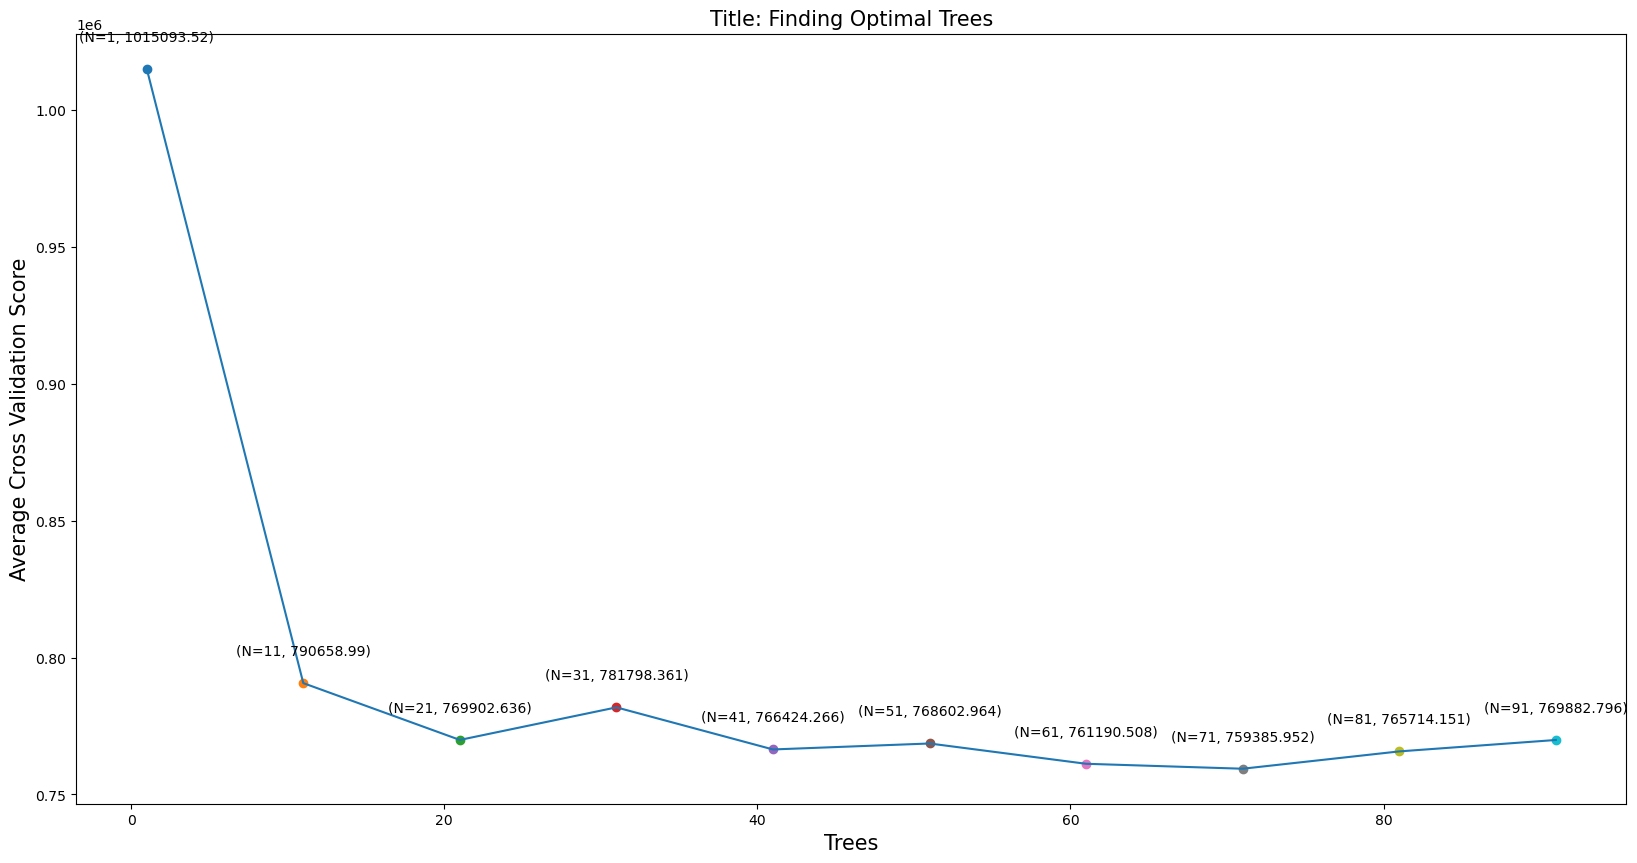

In [14]:
# find optimal number of trees using cross validation
figure, axis = plt.subplots(figsize=(20, 10))



scores_array=[]
i_track = []
for i in range(1, 101,10):
    randForest = RandomForestRegressor(n_estimators = i)
    cvs = cross_validate(randForest, x_train, y_train, scoring=("neg_mean_absolute_error"),cv=10)
#     print(cvs["test_score"])    
    avg_cvs_score = np.mean(cvs["test_score"])
    print(randForest,':', avg_cvs_score)
    i_track.append(i)
    scores_array.append(avg_cvs_score)
    axis.scatter(i,np.abs(avg_cvs_score))
    axis.annotate('(N=' +str(i) +', '+ str(round(np.abs(avg_cvs_score),3)) +')', (i, np.abs(avg_cvs_score)), textcoords='offset points', xytext=(0,20), ha='center')



axis.plot(i_track, np.abs(scores_array))

axis.set_title('Title: Finding Optimal Trees', fontsize=15)
axis.set_ylabel('Average Cross Validation Score', fontsize=15)
axis.set_xlabel('Trees', fontsize=15)

## Train Model

In [15]:
randForest = RandomForestRegressor(n_estimators=81, random_state=0)

In [16]:
randForest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=81, random_state=0)

In [17]:
predictions = randForest.predict(x_test)

In [18]:
predictions
# 5552685 5633500

array([ 5552685.18518519,  7019358.02469136,  3762586.41975309,
        4445518.51851852,  3727672.83950617,  3477876.54320988,
        5132469.13580247,  5216901.2345679 ,  2700617.28395062,
        2902506.79012346, 10591468.39506173,  3257196.50205761,
        3028234.56790123,  3491530.86419753,  3591000.        ,
        4044790.12345679,  3397186.41975309,  5168506.17283951,
        3669123.45679012,  3911703.7037037 ,  5313172.83950617,
        5997876.54320988,  3005448.55967078,  3586808.64197531,
        4958333.33333333,  6563450.61728395,  3385148.14814815,
        4740987.65432099,  6221012.34567901,  3254049.38271605,
        5556358.02469136,  3175148.14814815,  6602987.65432099,
        4342074.07407407,  3035450.61728395,  6274117.28395062,
        4634518.51851852,  3683944.44444444,  3001358.02469136,
        4136308.64197531,  4221086.41975309,  2846407.40740741,
        7120641.97530864,  4228777.77777778,  3946185.18518519,
        4195506.17283951,  7278530.86419